# Practice 04 Foundation of Machine Learning

Dataset is a historical flight data in Malaysia from Oct 2018 – Nov 2018
Data consist of information of flight such as:
1. Date of flight
2. Date of arrival
3. Departure Delay
4. Tail Number
5. Airline Name
6. Departure Location
7. Arrival Location
8. Flight Number
9. Delay


**There are 3 models that you have to make:**
1. Linear Regression
2. Logistic Regression
3. Choose 1 Supervised model

**Task**
1. Provide travel recommendation to passenger (best time to take a flight or best airline), so they will not get caught in delay. Each recommendation has to be supported by at least 1 graph
2. Create a model to estimate the delay duration ( Linear Regression )
3. Create a model to predict delay > 60 min ( Logistic regression and another supervised model you choosing )
4. Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created
5. Using those models predict delay that will happened in December for delay >60

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

## Import dataset

### Train Dataset

In [2]:
df_train = pd.read_csv('training_dataset.csv')
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [4]:
df_train['scheduled_departure_time'] = pd.to_datetime(df_train['scheduled_departure_time'])
df_train['scheduled_arrival_time'] = pd.to_datetime(df_train['scheduled_arrival_time'])

### Test Dataset

In [5]:
df_test = pd.read_csv('test_dataset.csv')
df_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,...,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20


## EDA

In [6]:
df_train[['delay']].describe(include = [np.number])

,delay
count,111068.000000
mean,11.540210
std,26.806913
min,0.000000
25%,0.000000
50%,1.000000
75%,13.000000
max,978.000000


75% of flights delays range from 0 to 13 minutes 

In [7]:
df_train.describe(exclude = [np.number])

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,...,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration
count,111068,111068,111068,111068,111063,111068,111068,111068,66859,111068,...,111068,111068,12087,111068,111068,53050,111068,111049,111049,111065
unique,2515,104,104,12912,14210,15,16,1,189,16,...,154,39,267,154,4,17,43,49,49,692
top,MH5312,AK,AirAsia,2018-11-07 23:00:00,2018-10-20 09:30:00,Kuala Lumpur,KUL,MY,H2,Kuala Lumpur International Airport,...,KUL,MY,02,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h
freq,114,25437,25437,80,44,69552,62530,111068,1358,62530,...,16243,60343,802,16243,105958,18403,60343,45019,45019,9784
first,NaN,NaN,NaN,2018-10-04 22:00:00,2018-10-04 22:45:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-11-30 23:55:00,2018-12-01 06:40:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Top 10 most airlines flights

In [8]:
airline_count = df_train.groupby(['airline_name'])[['id']].count().sort_values(by = ['id'], ascending = False).reset_index()
airline_count.head()

,airline_name,id
0,AirAsia,25437
1,Malaysia Airlines,23198
2,Malindo Air,8374
3,Qatar Airways,5993
4,Emirates,5961


Text(0, 0.5, 'Airline')

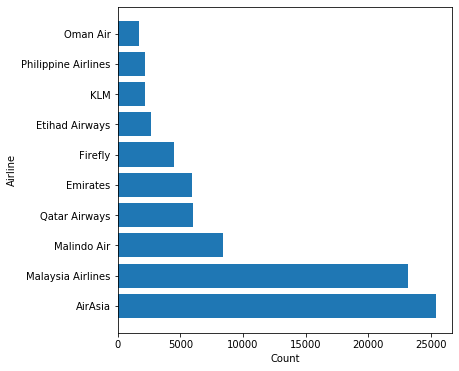

In [9]:
plt.figure(figsize=(6, 6))
plt.barh(airline_count['airline_name'].head(10), airline_count['id'].head(10))
plt.xlabel('Count')
plt.ylabel('Airline')

### Top 10 Departures City Airport

In [10]:
departure_count = df_train.groupby(['departure_airport_city'])[['id']].count().sort_values(by = ['id'], ascending = False).reset_index()
departure_count.head()

,departure_airport_city,id
0,Kuala Lumpur,69552
1,Penang,11291
2,Kota Kinabalu,8439
3,Kuching,5991
4,Johor Bharu,4251


Text(0, 0.5, 'Departure Airport City')

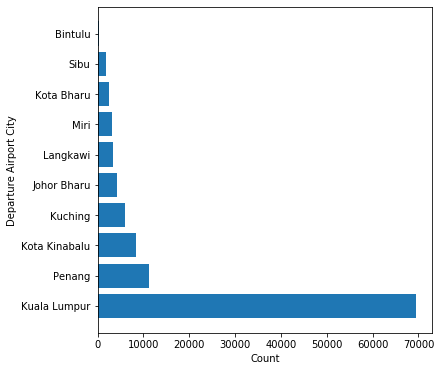

In [11]:
plt.figure(figsize=(6, 6))
plt.barh(departure_count['departure_airport_city'].head(10), departure_count['id'].sort_values(ascending = False).head(10))
plt.xlabel('Count')
plt.ylabel('Departure Airport City')

### Top 10 Arrival Airport City

In [12]:
arrival_count = df_train.groupby(['arrival_airport_city'])[['id']].count().sort_values(by = ['id'], ascending = False).reset_index()
arrival_count.head()          

,arrival_airport_city,id
0,Kuala Lumpur,20535
1,Singapore,12553
2,Penang,6374
3,Kuching,5043
4,Kota Kinabalu,4675


Text(0, 0.5, 'Arrival Airport City')

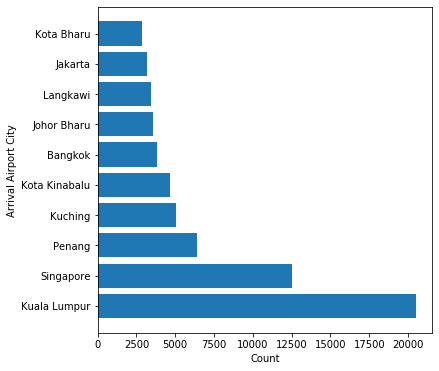

In [13]:
plt.figure(figsize=(6, 6))
plt.barh(arrival_count['arrival_airport_city'].head(10), arrival_count['id'].sort_values(ascending = False).head(10))
plt.xlabel('Count')
plt.ylabel('Arrival Airport City')

### Top 10 most airlines with highest mean delays in minute 

In [14]:
mean_delay = df_train.groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index()
mean_delay.head()

,airline_name,delay
0,Cargolux,190.200000
1,Nepal Airlines,96.535714
2,Pakistan International Airlines,58.625000
3,Biman Bangladesh Airlines,46.114286
4,VietJet Air,40.385965


Text(0, 0.5, 'Airline')

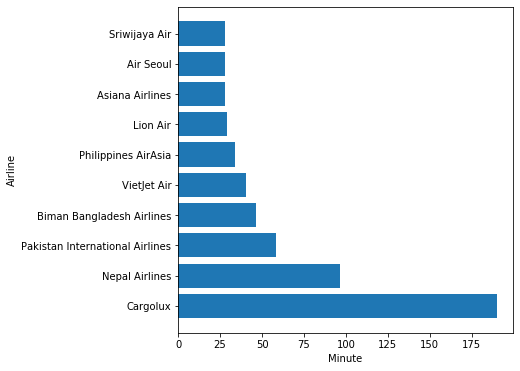

In [15]:
plt.figure(figsize=(6, 6))
plt.barh(mean_delay['airline_name'].head(10), mean_delay['delay'].sort_values(ascending = False).head(10))
plt.xlabel('Minute')
plt.ylabel('Airline')

### Top 10 most airlines with lowest mean delays in minute 

Text(0, 0.5, 'Airline')

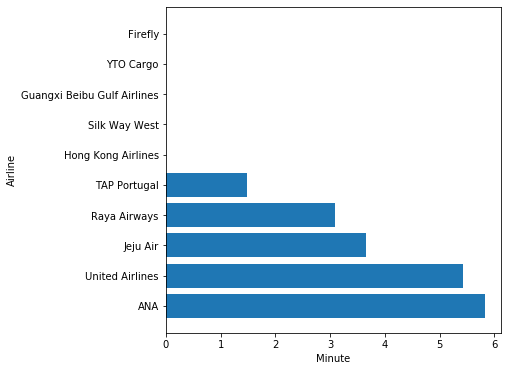

In [16]:
plt.figure(figsize=(6, 6))
plt.barh(mean_delay['airline_name'].tail(10), mean_delay['delay'].tail(10))
plt.xlabel('Minute')
plt.ylabel('Airline')

### Top 10 most airlines with lowest mean delays in minute from Depart Kuala Lumpur City

Text(0.5, 0, 'Minute')

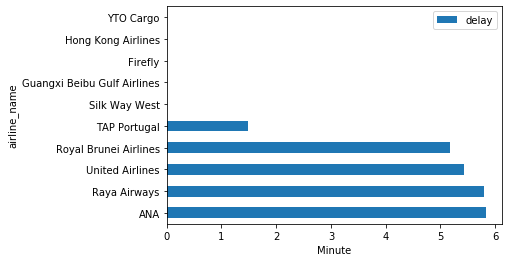

In [17]:
df_train[df_train['departure_airport_city'] == 'Kuala Lumpur'].groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().tail(10).plot.barh('airline_name', 'delay')
plt.xlabel('Minute')

### Top 10 most airlines with lowest mean delays in minute arrive in Kuala Lumpur City

In [18]:
arrival_delay = df_train[df_train['arrival_airport_city'] == 'Kuala Lumpur'].groupby(['scheduled_arrival_time'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index()
arrival_delay.tail(10)

,scheduled_arrival_time,delay
7387,2018-10-30 23:55:00,0.0
7388,2018-10-30 23:45:00,0.0
7389,2018-10-30 14:50:00,0.0
7390,2018-10-30 23:35:00,0.0
7391,2018-10-30 23:25:00,0.0
7392,2018-10-30 23:00:00,0.0
7393,2018-10-30 22:45:00,0.0
7394,2018-10-30 15:40:00,0.0
7395,2018-10-30 14:55:00,0.0
7396,2018-11-03 05:55:00,0.0


Text(0.5, 0, 'Minute')

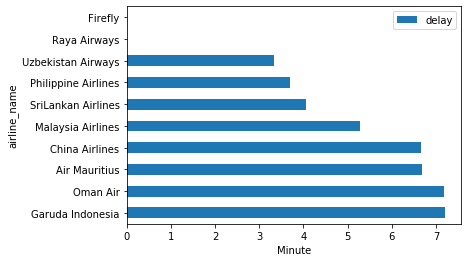

In [19]:
df_train[df_train['arrival_airport_city'] == 'Kuala Lumpur'].groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().tail(10).plot.barh('airline_name', 'delay')
plt.xlabel('Minute')

<Figure size 1440x1440 with 0 Axes>

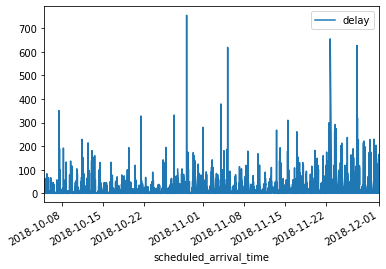

<Figure size 1440x1440 with 0 Axes>

In [20]:
arrival_delay.plot('scheduled_arrival_time', 'delay')
plt.figure(figsize = (20, 20))

### Top 10 times with lowest mean delays in minute depart from Kuala Lumpur City

There were some airflights that had 0 delays, but most had specific destination such as YTO Cargo only to China, if the subject only depart from Kuala Lumpur YTO Cargo, Hongkong Airlines, Firefly, Guangxi, and Silkway

In [21]:
departure_delay = df_train[df_train['departure_airport_city'] == 'Kuala Lumpur'].groupby(['scheduled_departure_time'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index()
departure_delay.head(10)

,scheduled_departure_time,delay
0,2018-11-17 14:45:00,660.0
1,2018-11-02 17:30:00,630.0
2,2018-10-10 11:15:00,366.5
3,2018-10-17 11:15:00,364.0
4,2018-11-07 11:20:00,329.5
5,2018-11-26 18:30:00,317.0
6,2018-11-14 11:20:00,309.5
7,2018-11-21 18:30:00,292.0
8,2018-11-30 18:30:00,289.0
9,2018-11-23 14:30:00,278.0


Text(0.5, 0, 'Minute')

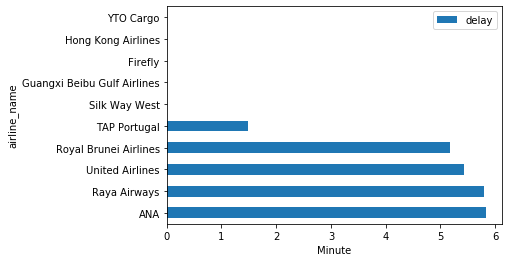

In [22]:
df_train[df_train['departure_airport_city'] == 'Kuala Lumpur'].groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().tail(10).plot.barh('airline_name', 'delay')
plt.xlabel('Minute')

<Figure size 1440x1440 with 0 Axes>

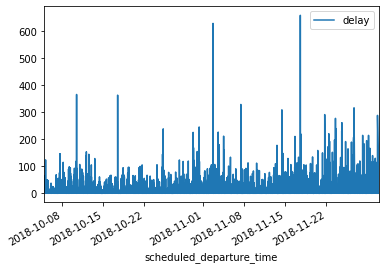

<Figure size 1440x1440 with 0 Axes>

In [23]:
departure_delay.plot('scheduled_departure_time', 'delay')
plt.figure(figsize = (20, 20))

## Checking delay by day, time, departure city, and flag duration

In [24]:
df_train["scheduled_departure_day"] = df_train["scheduled_departure_time"].apply(lambda x: x.strftime("%A"))

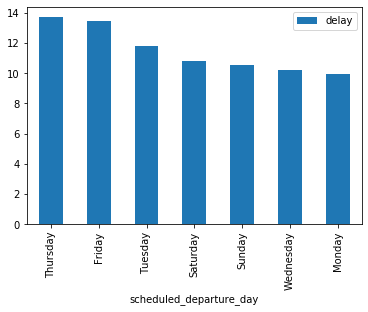

In [25]:
df_train.groupby(['scheduled_departure_day'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().plot.bar('scheduled_departure_day', 'delay')

In [26]:
#Extract Minute

df_train["scheduled_departure_time_hour"] = df_train["scheduled_departure_time"].dt.time

<Figure size 1440x1440 with 0 Axes>

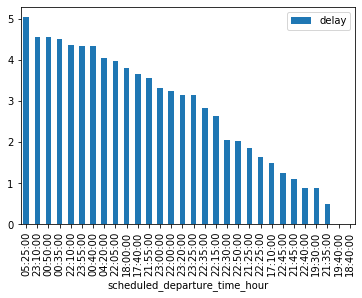

<Figure size 1440x1440 with 0 Axes>

In [27]:
df_train.groupby(['scheduled_departure_time_hour'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).tail(30).reset_index().plot.bar('scheduled_departure_time_hour', 'delay')
plt.figure(figsize=(20, 20))

With assumption delays from departure based on graph seems that night till midnight had lower average of delay. Although this need further check by day and holiday

In [28]:
df_train.groupby(['scheduled_departure_time_hour', 'scheduled_departure_day'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).tail(10).reset_index()

,scheduled_departure_time_hour,scheduled_departure_day,delay
0,18:50:00,Thursday,0.0
1,21:25:00,Saturday,0.0
2,18:50:00,Friday,0.0
3,18:40:00,Thursday,0.0
4,18:40:00,Saturday,0.0
5,21:05:00,Thursday,0.0
6,21:05:00,Tuesday,0.0
7,18:20:00,Tuesday,0.0
8,21:10:00,Thursday,0.0
9,20:20:00,Wednesday,0.0


Seems weekdays and night time are best time to depart

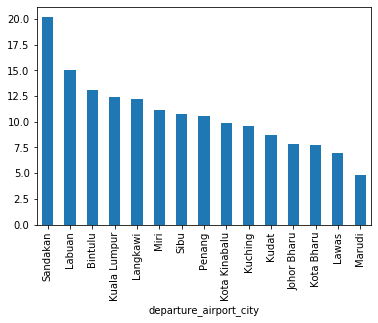

In [29]:
df_train.groupby(['departure_airport_city'])['delay'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [30]:
df_train['duration_ticket'] = df_train['scheduled_arrival_time'] - df_train['scheduled_departure_time']

In [31]:
from datetime import datetime, date, time, timedelta

df_train['duration_ticket'] = df_train['duration_ticket'].apply(lambda x: x.total_seconds()/60)

In [32]:
df_train[['delay', 'duration_ticket']].describe(include = [np.number])

,delay,duration_ticket
count,111068.000000,111063.000000
mean,11.540210,136.690113
std,26.806913,118.740274
min,0.000000,20.000000
25%,0.000000,60.000000
50%,1.000000,95.000000
75%,13.000000,160.000000
max,978.000000,1330.000000


Text(0, 0.5, 'Delay in minute')

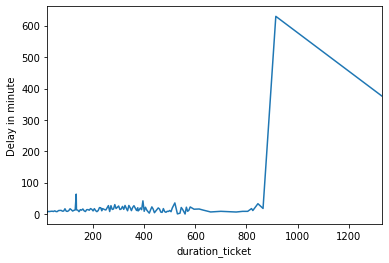

In [33]:
df_train.groupby(['duration_ticket'])['delay'].mean().plot()
plt.ylabel('Delay in minute')

I can't see the pattern between whole duration data and delay, so I decided to see the pattern by partitioning it by certain time of duration as shown below

Text(0, 0.5, 'Delay in minute')

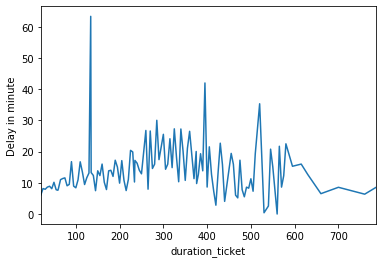

In [34]:
df_train[df_train['duration_ticket'] < 800].groupby(['duration_ticket'])['delay'].mean().plot()
plt.ylabel('Delay in minute')

Text(0, 0.5, 'Delay in minute')

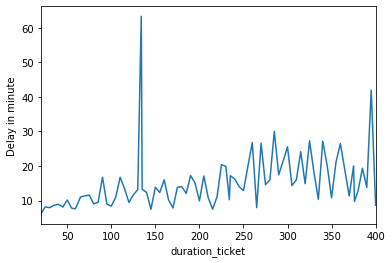

In [35]:
df_train[df_train['duration_ticket'] <= 400].groupby(['duration_ticket'])['delay'].mean().plot()
plt.ylabel('Delay in minute')

Seems that the relationships between duration and delay only captured with duration about 400 minutes, while beyond date, the  relationships between duration and delay are hard to see

## Calculate Outliers

In [36]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    q1_ext = q1 - 1.5 * iqr
    q3_ext = q3 + 1.5 * iqr
    
    return q1_ext, q3_ext

In [37]:
outliers(df_train, 'delay')

(-19.5, 32.5)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


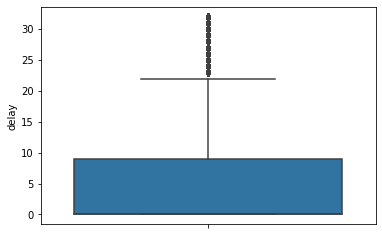

In [38]:
sns.boxplot(y='delay', data=df_train[df_train['delay'] <= 32.5])

For linear regression, I used filter out the delay above 32.5 minutes

In [39]:
df_train_clean = df_train[(df_train['delay'] <= 32.5)]
df_train_clean.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,scheduled_departure_day,scheduled_departure_time_hour,duration_ticket
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,Friday,22:00:00,65.0
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Friday,22:00:00,115.0
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,Friday,22:00:00,115.0
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,Friday,22:05:00,175.0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,Friday,22:10:00,195.0


## Checking NA Value

In [40]:
df_train_clean[df_train_clean['duration_ticket'].isna()][['airline_name', 'arrival_airport_country','arrival_airport_city','departure_airport_city']]

,airline_name,arrival_airport_country,arrival_airport_city,departure_airport_city
8167,Cathay Pacific,MY,Penang,Kuala Lumpur
8168,Cathay Dragon,MY,Penang,Kuala Lumpur
38176,Volga-Dnepr,GU,Guam,Kuala Lumpur
100795,Air New Zealand,AU,Cairns,Kuala Lumpur
100798,Air New Zealand,AU,Cairns,Kuala Lumpur


## Fill NA Value

Fill NA Value manually by checking in google for removed outliers

In [41]:
df_train_clean.loc[(df_train_clean['arrival_airport_city'] == 'Penang') & (df_train_clean['departure_airport_city'] == 'Kuala Lumpur') & (df_train_clean['duration_ticket'].isna()), 'duration_ticket'] = 60

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
df_train_clean.loc[(df_train_clean['arrival_airport_city'] == 'Guam') & (df_train_clean['departure_airport_city'] == 'Kuala Lumpur') & (df_train_clean['duration_ticket'].isna()), 'duration_ticket'] = 361

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
df_train_clean.loc[(df_train_clean['arrival_airport_city'] == 'Cairns') & (df_train_clean['departure_airport_city'] == 'Kuala Lumpur') & (df_train_clean['duration_ticket'].isna()), 'duration_ticket'] = 476

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
df_train_clean[df_train_clean['duration_ticket'].isna()][['airline_name', 'arrival_airport_country','arrival_airport_city','departure_airport_city']]

,airline_name,arrival_airport_country,arrival_airport_city,departure_airport_city


In [45]:
#for raw data train

df_train.loc[(df_train['arrival_airport_city'] == 'Penang') & (df_train['departure_airport_city'] == 'Kuala Lumpur') & (df_train['duration_ticket'].isna()), 'duration_ticket'] = 60
df_train.loc[(df_train['arrival_airport_city'] == 'Guam') & (df_train['departure_airport_city'] == 'Kuala Lumpur') & (df_train['duration_ticket'].isna()), 'duration_ticket'] = 361
df_train.loc[(df_train['arrival_airport_city'] == 'Cairns') & (df_train['departure_airport_city'] == 'Kuala Lumpur') & (df_train['duration_ticket'].isna()), 'duration_ticket'] = 476

## Feature Engineering

### Training Data

#### Flag Delay

In [46]:
#Flag delay above 60 minutes equal to 1

df_train.loc[df_train['delay'] > 60, 'flag_delay'] = 1
df_train.loc[df_train['delay'] <= 60, 'flag_delay'] = 0

In [47]:
df_train['flag_delay'].value_counts(normalize = True)*100

0.0    96.41841
1.0     3.58159
Name: flag_delay, dtype: float64

#### Dummy Variables

In [48]:
obj = df_train_clean.select_dtypes(exclude=[np.number])
obj.describe()

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,scheduled_departure_day,scheduled_departure_time_hour
count,100209,100209,100209,100209,100204,100209,100209,100209,59241,100209,...,10887,100209,100209,47347,100209,100190,100190,100206,100209,100209
unique,2494,104,104,12733,13872,15,16,1,187,16,...,257,152,4,17,42,49,49,678,7,250
top,MH5312,AK,AirAsia,2018-11-07 23:00:00,2018-10-20 09:30:00,Kuala Lumpur,KUL,MY,H2,Kuala Lumpur International Airport,...,02,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h,Friday,01:00:00
freq,114,22416,22416,80,44,62249,55419,100209,1183,55419,...,751,14549,95626,16024,55246,40912,40912,9153,15572,2075
first,NaN,NaN,NaN,2018-10-04 22:00:00,2018-10-04 22:45:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-11-30 23:55:00,2018-12-01 06:40:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_train_clean.loc[df_train_clean['arrival_airport_country'] =='MY' , 'flag_my'] = 1
df_train_clean.loc[df_train_clean['arrival_airport_country'] !='MY', 'flag_my'] = 0

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


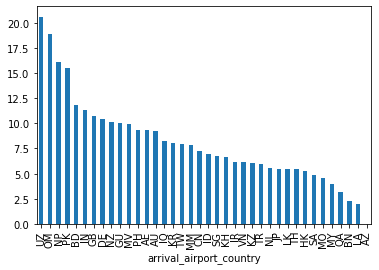

In [50]:
df_train_clean.groupby(['arrival_airport_country'])['delay'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [51]:
df_train.loc[df_train['arrival_airport_country'] =='MY' , 'flag_my'] = 1
df_train.loc[df_train['arrival_airport_country'] !='MY', 'flag_my'] = 0

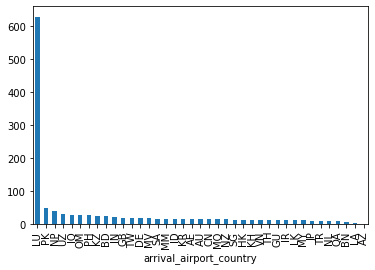

In [52]:
df_train.groupby(['arrival_airport_country'])['delay'].mean().sort_values(ascending = False).plot(kind = 'bar')

We can see the difference between clean training data and training data, that Luxembourg had highest average delay but if we remove the delay outlier, Uzbekisthan had the highest average delay destination 

### Test Data

In [53]:
df_test.loc[df_test['arrival_airport_country'] =='MY' , 'flag_my'] = 1
df_test.loc[df_test['arrival_airport_country'] !='MY', 'flag_my'] = 0

In [54]:
df_test['scheduled_departure_time'] = pd.to_datetime(df_test['scheduled_departure_time'])
df_test['scheduled_arrival_time'] = pd.to_datetime(df_test['scheduled_arrival_time'])

In [55]:
df_test['duration_ticket'] = df_test['scheduled_arrival_time'] - df_test['scheduled_departure_time']

In [56]:
df_test['duration_ticket'] = df_test['duration_ticket'].apply(lambda x: x.total_seconds()/60)

In [57]:
#Flag delay above 60 minutes equal to 1

df_test.loc[df_test['delay'] > 60, 'flag_delay'] = 1
df_test.loc[df_test['delay'] <= 60, 'flag_delay'] = 0

In [58]:
#Select not null value

df_test = df_test[df_test['duration_ticket'].notnull()]
df_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flag_my,duration_ticket,flag_delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,0.0,280.0,0.0
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,0.0,280.0,0.0
2,483246,TK8186,TK,Turkish Airlines,2018-12-01,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27,1.0,160.0,0.0
3,483247,AK6324,AK,AirAsia,2018-12-01,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,...,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95,1.0,65.0,1.0
4,483248,UA7967,UA,United Airlines,2018-12-01,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,0.0,400.0,0.0


## Linear Regression

For removed outliers

In [59]:
mul_reg = df_train_clean[['flag_my', 'duration_ticket', 'delay']].copy()

In [60]:
model = mul_reg.copy()

In [61]:
X_train = model.iloc[:, 0:len(model.columns)-1]
y_train = model.iloc[:, len(model.columns)-1]

In [62]:
X_test = df_test[['flag_my', 'duration_ticket']]
y_test = df_test[['delay']]

In [63]:
multi_regression = LinearRegression()
multi_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred_train = multi_regression.predict(X_train)

In [65]:
y_pred_test = multi_regression.predict(X_test)

In [66]:
print('mse train = {}'.format(mean_squared_error(y_pred_train, y_train)))

mse train = 62.657283222943974


In [67]:
print('mse train = {}'.format(mean_squared_error(y_pred_test, y_test)))

mse train = 1110.1780937264607


In [68]:
import math

rmse_train = math.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = math.sqrt(mean_squared_error(y_pred_test, y_test))
print(rmse_train)
print(rmse_test)

7.915635364450789
33.31933513331952


In [69]:
from scipy import stats

params = np.append(multi_regression.intercept_,multi_regression.coef_)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
MSE = (sum((y_train-y_pred_train)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
myDF3['Index'] = ['Intercept', 'flag_my', 'duration_ticket']
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilites            Index
0        5.9907              NaN       NaN           NaN        Intercept
1       -2.4784              NaN       NaN           NaN          flag_my
2        0.0051              NaN       NaN           NaN  duration_ticket


D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


In [70]:
#For raw train data

mul_reg = df_train[['flag_my', 'duration_ticket', 'delay']].copy()
model = mul_reg.copy()

In [71]:
X_train = model.iloc[:, 0:len(model.columns)-1]
y_train = model.iloc[:, len(model.columns)-1]

In [72]:
X_test = df_test[['flag_my', 'duration_ticket']]
y_test = df_test[['delay']]

In [73]:
multi_regression = LinearRegression()
multi_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
y_pred_train = multi_regression.predict(X_train)
y_pred_test = multi_regression.predict(X_test)

In [75]:
print('mse train = {}'.format(mean_squared_error(y_pred_train, y_train)))
print('mse train = {}'.format(mean_squared_error(y_pred_test, y_test)))

mse train = 713.7446188497047
mse train = 998.4320711948617


In [76]:
rmse_train = math.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_test = math.sqrt(mean_squared_error(y_pred_test, y_test))
print('rmse train:', rmse_train)
print('rmse test:',rmse_test)

rmse train: 26.715999304718224
rmse test: 31.59797574520972


All predictors are significant, means that if depart from malaysia then delay departure would increase about 2.2 minutes, while duration ticket showed positive relationships. But the model is not very predictive shown by the prediction on test data and high MSE

### Logistic Regression

In [77]:
log_reg = df_train[['duration_ticket','flag_my', 'flag_delay']].copy()
log_reg.head()

,duration_ticket,flag_my,flag_delay
0,65.0,1.0,0.0
1,115.0,0.0,0.0
2,115.0,0.0,0.0
3,175.0,1.0,0.0
4,195.0,0.0,0.0


In [78]:
model_log = log_reg.copy()

In [79]:
X_train = model_log.iloc[:, 0:len(model_log.columns)-1]
y_train = model_log.iloc[:, len(model_log.columns)-1]

In [80]:
X_test = df_test[['duration_ticket','flag_my']]
y_test = df_test[['flag_delay']]

In [81]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_test = logistic_regression.predict(X_test) # langsung keluar kelasnya, defaultnya 0.5
y_pred_train = logistic_regression.predict(X_train) # kalau predict proba akan keluar probability, bisa mengubah default

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 

In [83]:
print('Report:', classification_report(y_test, y_pred_test)) 

Report:               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     39124
         1.0       0.00      0.00      0.00      2431

    accuracy                           0.94     41555
   macro avg       0.47      0.50      0.48     41555
weighted avg       0.89      0.94      0.91     41555



C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.9414992179039827


### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
X_test = df_test[['duration_ticket', 'flag_my']]
y_pred_test = dt.predict(X_test)

In [87]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred_test))

accuracy: 0.9414992179039827


Although the accuracy is high, this could be caused by imbalanced class data, this could be anticipated by using under sampling or over sampling technique , such as SMOTE or other methods

#### Handling imbalanced class

In [88]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) 

In [89]:
pd.Series(y_train).value_counts()

1.0    107090
0.0    107090
dtype: int64

In [90]:
#Logistic Regression
logistic_regression.fit(X_train, y_train)

y_pred_train = logistic_regression.predict(X_train)

C:\Users\gilang.mahardika\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred_train))

,0,1
0,74089,33001
1,66414,40676


In [92]:
print(metrics.recall_score(y_train, y_pred_train)) 

0.3798300494910823


In [93]:
print(metrics.precision_score(y_train, y_pred_train)) 

0.5520854540765775


In [94]:
print(classification_report(y_train, y_pred_train)) 

              precision    recall  f1-score   support

         0.0       0.53      0.69      0.60    107090
         1.0       0.55      0.38      0.45    107090

    accuracy                           0.54    214180
   macro avg       0.54      0.54      0.52    214180
weighted avg       0.54      0.54      0.52    214180



In [95]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
X_test = df_test[['duration_ticket', 'flag_my']]
y_pred_test = dt.predict(X_test)

In [97]:
print('accuracy:', metrics.accuracy_score(y_train, y_pred_train))
print('accuracy:', metrics.accuracy_score(y_test, y_pred_test))

accuracy: 0.5358343449435055
accuracy: 0.5462158585007821


Seems that Logistic Regression is much better, but the logistic regression and decision tree model had poor performance on the recall, means they predict much more to no delay while it should be delay

**4. Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created**

Yes.

* I did feature engineering by creating flag for destination outside and inside malaysia (depart from malaysia and arrive from foreign countries). I want to see the difference of delay by seeing their destination

* I create flight duration based on the ticket by substract the arrival and departure time, so I can see if there could be any relationships with delay

**5. Using those models predict delay that will happened in December for delay >60**

In [98]:
y_pred_test = logistic_regression.predict(X_test)
df_prediction = df_test.copy()
df_prediction['flag_delay'] = y_pred_test
df_prediction[df_prediction['flag_delay'] == 1]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flag_my,duration_ticket,flag_delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,0.0,280.0,1.0
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,0.0,280.0,1.0
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27,1.0,160.0,1.0
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,0.0,400.0,1.0
5,483249,AC6257,AC,Air Canada,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,0.0,400.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41550,704757,GA9088,GA,Garuda Indonesia,2018-12-20 15:50:00,2018-12-21 04:55:00,Kuala Lumpur,KUL,MY,C2,...,Europe,NaN,Europe/Amsterdam,772,Boeing 777-200 / 200ER,13h 5m,140,0.0,785.0,1.0
41551,705277,MXD177,MXD,Malindo Air,2018-12-20 08:50:00,2018-12-20 12:00:00,Kuala Lumpur,KUL,MY,C35,...,Asia,NaN,Asia/Makassar,738,Boeing 737-800 Passenger,3h 10m,19,0.0,190.0,1.0
41552,705280,MXD177,MXD,Malindo Air,2018-12-20 08:50:00,2018-12-20 12:00:00,Kuala Lumpur,KUL,MY,C35,...,Asia,NaN,Asia/Makassar,738,Boeing 737-800 Passenger,3h 10m,19,0.0,190.0,1.0
41553,706064,ID*6018,ID*,Batik Air,2018-12-20 12:45:00,2018-12-20 16:40:00,Kuala Lumpur,KUL,MY,C33,...,Asia,NaN,Asia/Kolkata,739,Boeing 737-900 Passenger,3h 55m,43,0.0,235.0,1.0


In [99]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred_test))

accuracy: 0.6647094212489472
